In [394]:
# Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
# Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
# Какой клиент совершил больше всего успешных операций? (success == True)
# С какой платформы осуществляется наибольшее количество успешных операций?
# Какую платформу предпочитают премиальные клиенты?
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
# Постройте график распределения числа успешных операций
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, 
#   используя sns.countplot (x – возраст, y – число успешных операций). 
# Клиенты какого возраста совершили наибольшее количество успешных действий?

In [395]:
import pandas as pd
import seaborn as sns

In [396]:
user_data = pd.read_csv('d:/Pythoning/user_data.csv')#, encoding='windows-1251')

In [397]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [398]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [399]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [400]:
logs =  pd.read_csv('d:/Pythoning/logs.csv')

In [401]:
logs.shape

(4500, 4)

In [402]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [403]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [404]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [405]:
max_age = logs.query("success == True").value_counts('client').max()

In [406]:
success_number = logs.query("success == True")\
                    .groupby('client', as_index=False)\
                    .agg({'success':'count'})\
                    .rename(columns={'success':'success_count'})\
                    .sort_values('success_count', ascending = False)

In [407]:
max_success = success_number.success_count.max()

In [408]:
success_clients = success_number.query("success_count == @max_success").client.sort_values().tolist()

In [409]:
success_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [410]:
success_clients_list = ', '.join([str(client) for client in success_clients])

In [411]:
[success_clients_list]

['12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584']

In [412]:
# второй вариант подсчета успешных операций
success_number_2 = logs\
                    .groupby('client', as_index=False)\
                    .agg({'success':'sum'})\
                    .rename(columns={'success':'success_count'})\
                    .sort_values('success_count', ascending = False)

In [413]:
success_number_2

,client,success_count
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
...,...,...
2157,54315,0
689,17713,0
3042,76192,0
3041,76172,0


In [414]:
# С какой платформы осуществляется наибольшее количество успешных операций?
# вариант 1
max_platform = logs\
    .query("success == True")\
    .groupby('platform')\
    .agg({'platform' : 'count'})\
    .platform\
    .idxmax()

In [415]:
max_platform

'phone'

In [416]:
# вариант 2
logs.query("success == True").platform.value_counts().idxmax()

'phone'

In [417]:
# Какую платформу предпочитают премиальные клиенты?
data_users = logs.merge(user_data, how='left')

In [418]:
data_users

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0
...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,False,66.0
4496,73299,True,phone,1585458370,NaN,NaN
4497,8967,True,phone,1585465121,False,33.0
4498,52880,False,phone,1585455362,NaN,NaN


In [419]:
data_users.query("premium ==True").platform.value_counts().idxmax()

'phone'

In [420]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
# используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

# Используйте датасет, который вы получили на предыдущем шаге.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

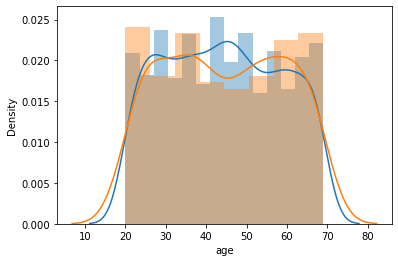

In [421]:
sns.distplot(user_data.query("premium == False").age)
sns.distplot(user_data.query("premium == True").age)

In [473]:
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

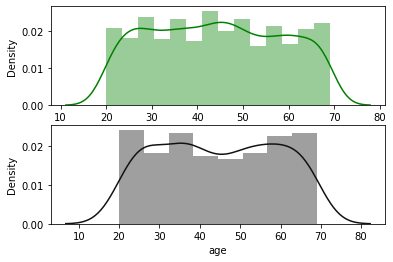

In [423]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.distplot(user_data.query("premium == False").age, ax=ax[0], color='green')
sns.distplot(user_data.query("premium == True").age, ax=ax[1], color='#111111')

In [445]:
client_all_success = data_users\
    .groupby('client')\
    .agg({'success':'sum'})

In [448]:
client_all_success.value_counts()

success
1          2791
0          1166
2            43
41            9
3             1
40            1
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

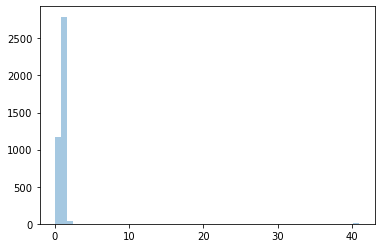

In [443]:
sns.distplot(client_all_success, kde=False)

In [463]:
# Визуализируйте число успешных операций, сделанных на платформе computer,
# в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. 
# Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

success_age = data_users\
    .query("platform == 'computer'")\
    .groupby('age', as_index=False)\
    .agg({'success':'sum'})

In [469]:
success_age.head()

,age,success
0,20.0,11
1,21.0,15
2,22.0,8
3,23.0,15
4,24.0,26


<AxesSubplot:xlabel='age', ylabel='success'>

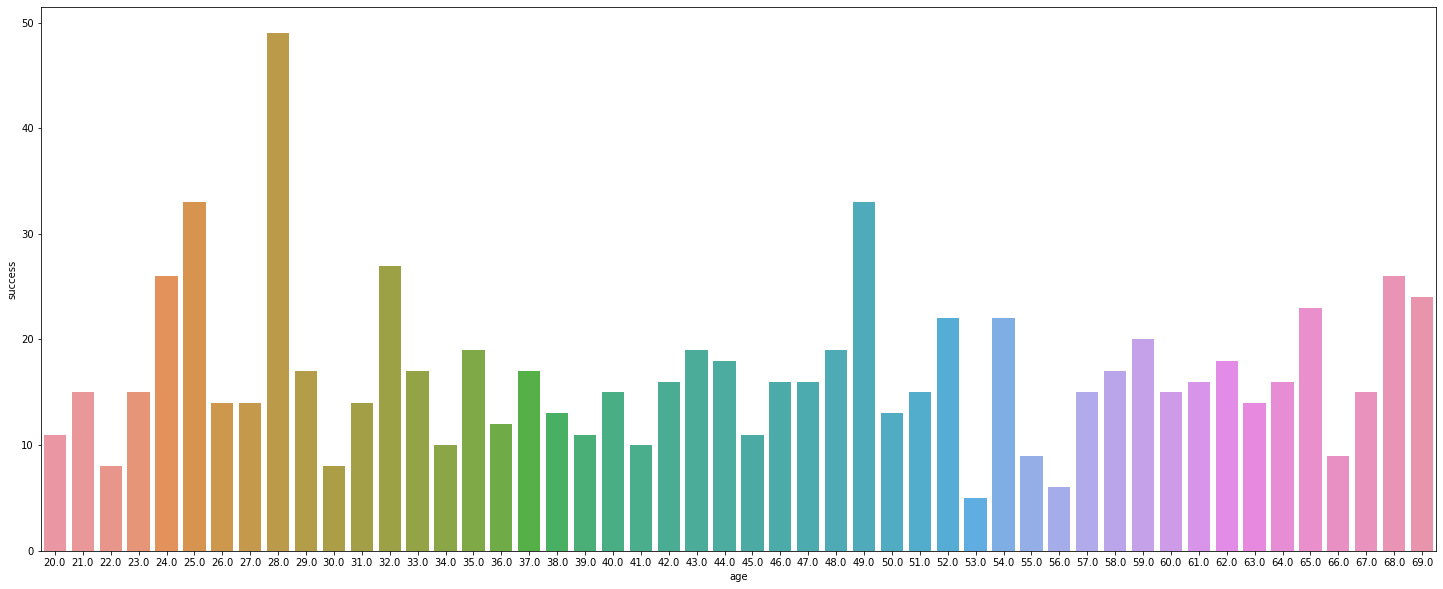

In [486]:
# Вариант 1 с countplot
plt.figure(figsize=(25, 10))
sns.barplot( x='age', y='success', data=success_age)
#sns.countplot( x='age', data=success_age)

In [481]:
data_users.query("platform == 'computer' and success==True")

,client,success,platform,time,premium,age
4,10931,True,computer,1585468629,False,28.0
7,32167,True,computer,1585457972,False,42.0
9,71087,True,computer,1585458446,False,36.0
11,502,True,computer,1585476186,NaN,NaN
13,51575,True,computer,1585409788,NaN,NaN
...,...,...,...,...,...,...
4487,68031,True,computer,1585464203,NaN,NaN
4489,85769,True,computer,1585447052,False,46.0
4491,81031,True,computer,1585401631,False,45.0
4493,92584,True,computer,1585408896,False,28.0


<AxesSubplot:xlabel='age', ylabel='count'>

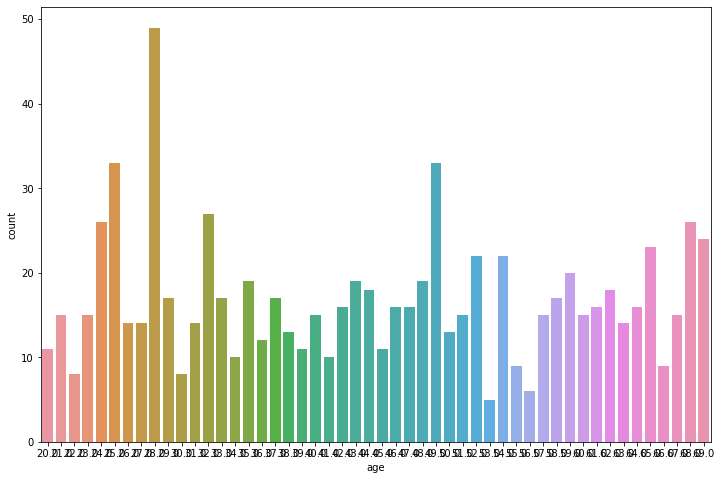

In [482]:
# Вариант 2 с countplot
plt.figure(figsize=(12, 8))
sns.countplot( x='age', data=data_users.query("platform == 'computer' and success==True"))